In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


#### Column-wise Explanation of Boston Housing Dataset
CRIM : Per capita crime rate by town (higher value = higher crime rate)

ZN : Proportion of residential land zoned for lots over 25,000 sq.ft. (higher value = more spacious residential areas)

INDUS	: Proportion of non-retail business acres per town (industrial areas).

CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise) — indicates proximity to Charles River.

NOX	:	Nitric oxides concentration (parts per 10 million) indicator of air pollution.

RM : Average number of rooms per dwelling (larger value indicates larger houses).

AGE : Proportion of owner-occupied units built prior to 1940 (higher value = older homes).

DIS :	Weighted distances to five Boston employment centers indicates proximity to major employment hubs.

RAD	: Index of accessibility to radial highways (higher value = better highway access).

TAX	:	Full value property tax rate per $10,000 (higher value = higher taxes)

PTRATIO	:	Pupil teacher ratio by town (education quality indicator lower is better).

B	:	Proportion of Black residents by town a somewhat outdated and controversial measure.

LSTAT	:	Percentage of lower status population (higher value = more economically disadvantaged residents).

MEDV :	Median value of owner-occupied homes in $1000s this is your target (price) variable.

In [32]:
# View summary statistics
summary_stats = df.describe()
print(summary_stats)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3.805268    9.403553  406.431472   18.537563  358.490939   
std     27.888705    2.0985

### Handling Missing Values in Dataset

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Count:")
print(missing_values)

Missing Values Count:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


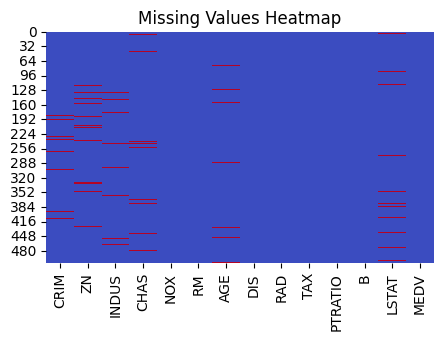

In [ ]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Calculate percentage of missing values
missing_percent = df.isnull().mean() * 100
print("\nPercentage of Missing Values:")
print(missing_percent)

# Handle missing values (example: drop rows with missing values)
df.dropna(how='any', inplace=True)


Percentage of Missing Values:
CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values Count:")
print(missing_values)

Missing Values Count:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Identify Outliers in Dataset
#### Outliers are data points that differ significantly from other observations and can affect model's performance

<Figure size 400x200 with 0 Axes>

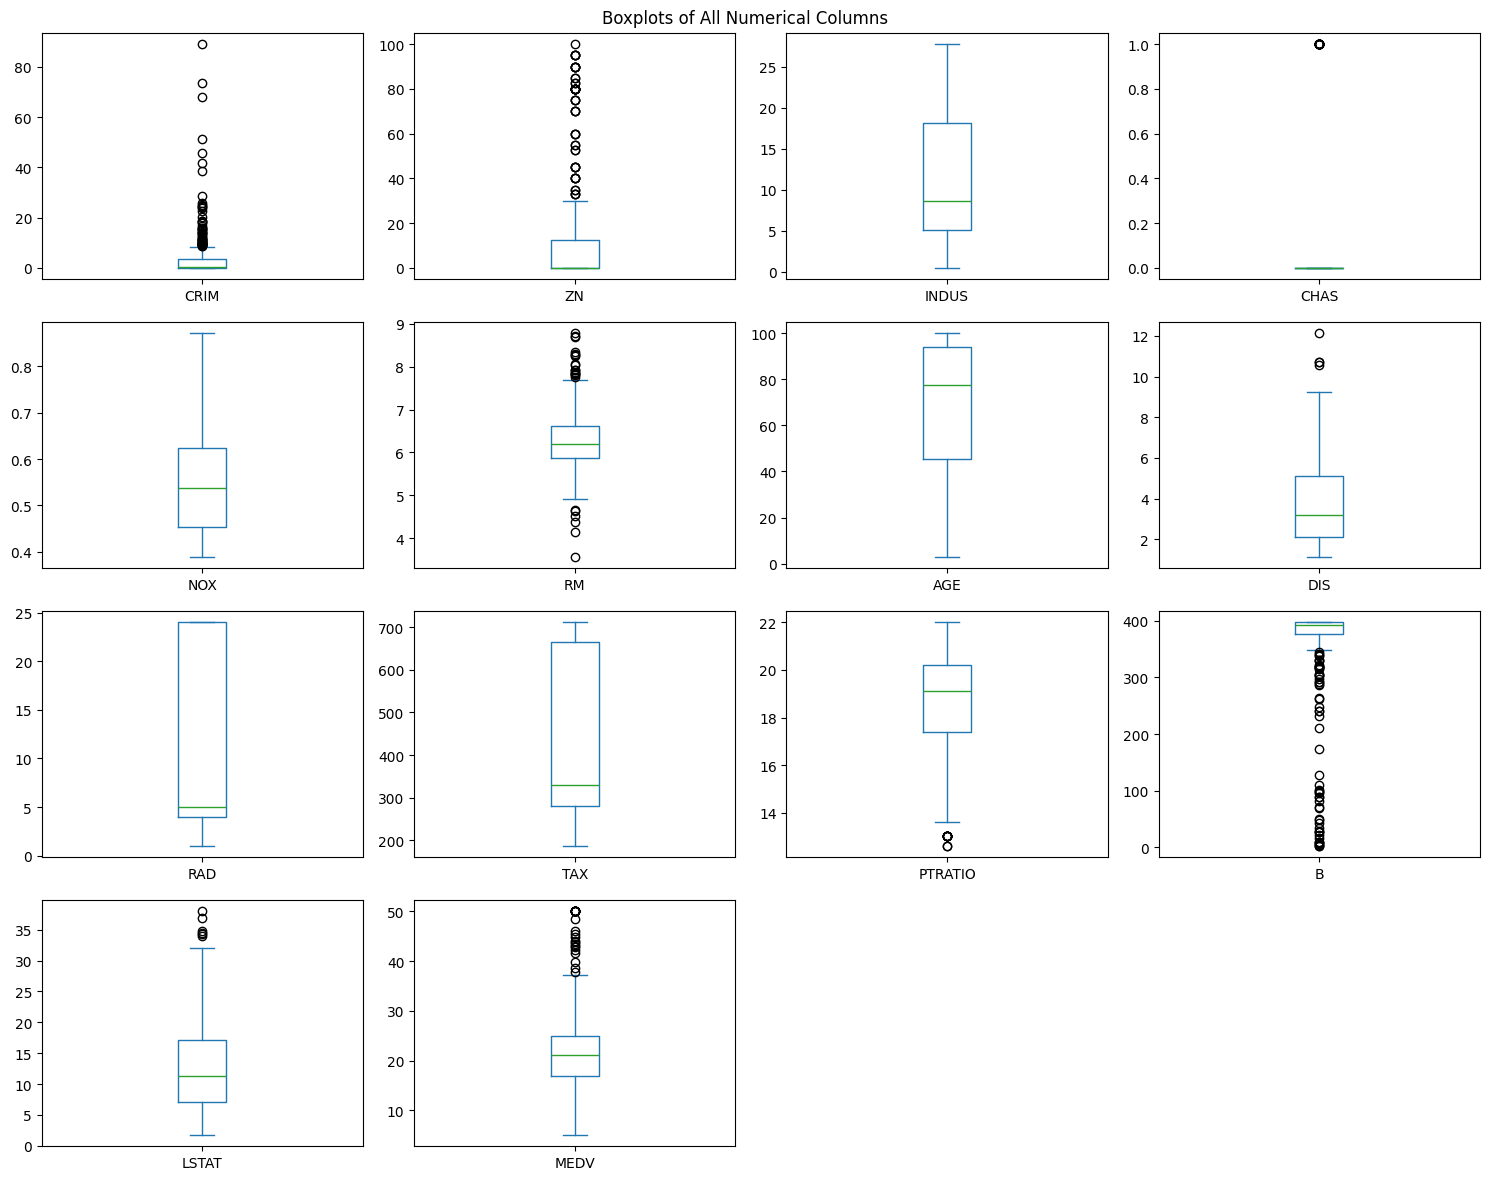

In [ ]:
# Using Boxplots : They show the distribution of data and highlight points that are significantly higher
# or lower than the rest of the data

# Create a boxplot for both size and price columns
plt.figure(figsize=(4, 2))
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 12), sharex=False, sharey=False)
plt.suptitle('Boxplots of All Numerical Columns')
plt.tight_layout()
plt.show()

### Analyzing the Relationship Between House Size and Price

In [31]:
# Calculate correlation of selected features with MEDV (House Price)
selected_columns = ['RM', 'CRIM', 'RAD', 'TAX', 'AGE', 'LSTAT', 'ZN', 'MEDV']
subset_df = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Display correlation of each selected feature with MEDV
print("Correlation of selected features with MEDV (House Price):")
print(correlation_matrix['MEDV'].sort_values(ascending=False))

Correlation of selected features with MEDV (House Price):
MEDV     1.000000
RM       0.723951
ZN       0.406822
CRIM    -0.397230
AGE     -0.407470
RAD     -0.416638
TAX     -0.508864
LSTAT   -0.743450
Name: MEDV, dtype: float64


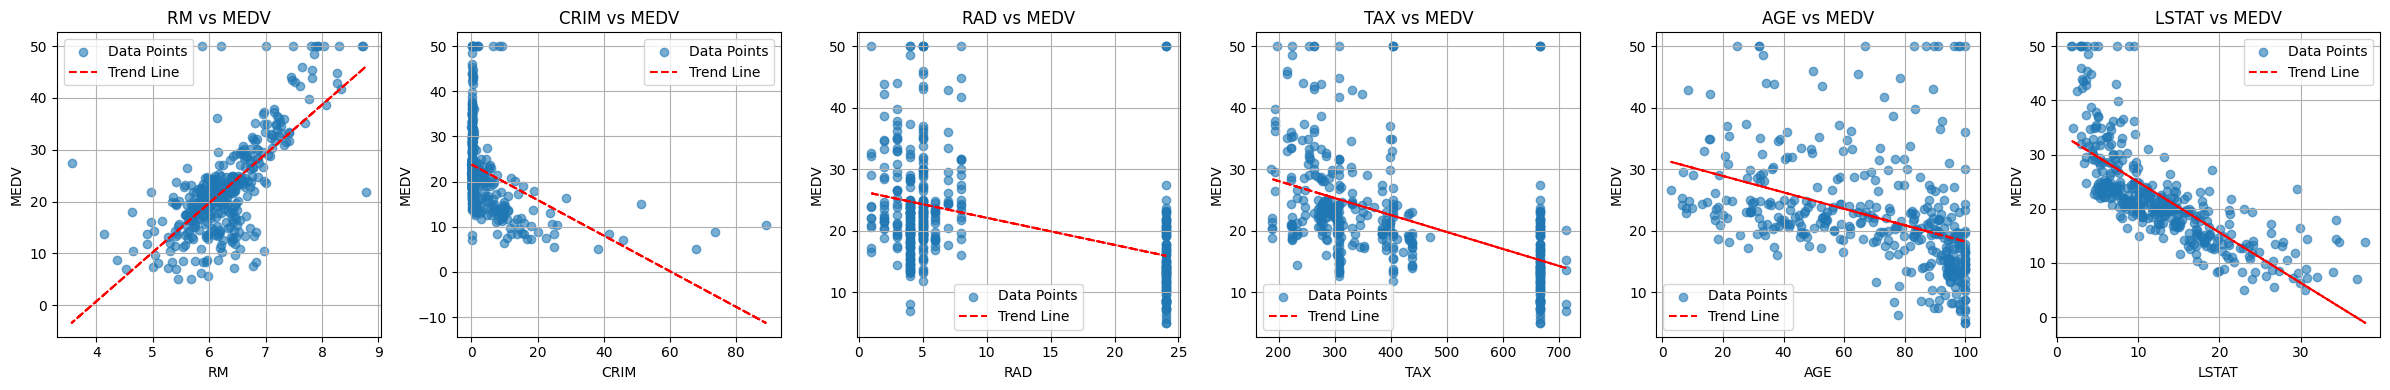

In [37]:
# List of features to correlate with MEDV
features = ['RM', 'CRIM', 'RAD', 'TAX', 'AGE', 'LSTAT']

# Create subplots (1 row, 6 columns)
fig, axes = plt.subplots(1, 6, figsize=(24, 4))  # Adjust width as needed

# Loop through each feature and corresponding axis
for idx, feature in enumerate(features):
    ax = axes[idx]
    ax.scatter(df[feature], df['MEDV'], alpha=0.6, label='Data Points')
    ax.set_title(f'{feature} vs MEDV')
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')

    # Add trend line
    z = np.polyfit(df[feature], df['MEDV'], 1)
    p = np.poly1d(z)
    ax.plot(df[feature], p(df[feature]), "r--", label='Trend Line')

    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Creating *scatter plots* to visualize the relationship between each selected feature and MEDV

- A scatter plot shows individual data points plotted on a two-dimensional graph.
It helps visualize correlation patterns (positive, negative, or none) between two variables.

- X-axis: The selected feature (e.g., RM, CRIM, etc.).
Y-axis: House price (MEDV)


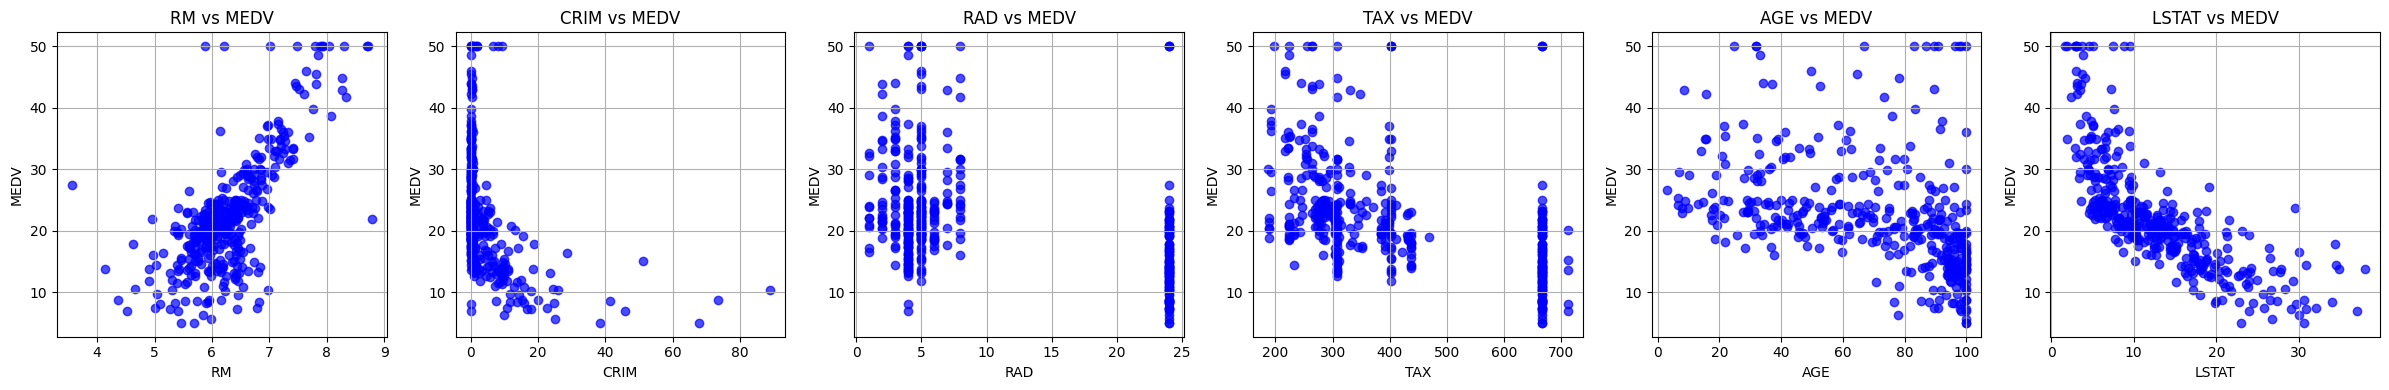

In [38]:
# List of selected features to compare with MEDV (House Price)
features = ['RM', 'CRIM', 'RAD', 'TAX', 'AGE', 'LSTAT']

# Create subplots: 1 row, 6 columns for each feature
fig, axes = plt.subplots(1, 6, figsize=(24, 4))

# Loop through each feature and its corresponding axis
for idx, feature in enumerate(features):
    ax = axes[idx]
    ax.scatter(df[feature], df['MEDV'], color='blue', marker='o', alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')
    ax.set_title(f'{feature} vs MEDV')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [39]:
# Compute descriptive statistics
stats = df.describe()
print(stats)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3.805268    9.403553  406.431472   18.537563  358.490939   
std     27.888705    2.0985

In [41]:
# Calculate and print correlation between selected features and MEDV
features = ['RM', 'CRIM', 'RAD', 'TAX', 'AGE', 'LSTAT','ZN']

for feature in features:
    correlation = df[feature].corr(df['MEDV'])
    print(f"Correlation between {feature} and MEDV: {correlation:.4f}")

Correlation between RM and MEDV: 0.7240
Correlation between CRIM and MEDV: -0.3972
Correlation between RAD and MEDV: -0.4166
Correlation between TAX and MEDV: -0.5089
Correlation between AGE and MEDV: -0.4075
Correlation between LSTAT and MEDV: -0.7434
Correlation between ZN and MEDV: 0.4068


In [45]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [46]:
from sklearn.preprocessing import StandardScaler

# List of features to normalize
features_to_normalize = ['RM', 'CRIM', 'RAD', 'TAX', 'AGE', 'LSTAT']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected features
normalized_features = scaler.fit_transform(df[features_to_normalize])

# Create a new DataFrame for normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize)

# Display normalized features
print(normalized_df.head())

         RM      CRIM       RAD       TAX       AGE     LSTAT
0  0.423161 -0.400818 -0.974609 -0.656944 -0.134014 -1.067126
1  0.202245 -0.398535 -0.858633 -0.978184  0.357849 -0.497196
2  1.298216 -0.398537 -0.858633 -0.978184 -0.281214 -1.197278
3  1.029962 -0.397984 -0.742657 -1.097162 -0.830521 -1.346610
4  0.215156 -0.398258 -0.742657 -1.097162 -0.367380 -1.035615


### Splitting the dataframe into Train-Test

In [73]:
# Features selected for model training
X = df[['RM', 'CRIM', 'RAD', 'TAX', 'AGE', 'LSTAT','PTRATIO','INDUS','NOX','CHAS','DIS','B']]

# Target variable
y = df['MEDV']

- Split your dataset into 80% training data and 20% testing data
- Maintain the relationship between features (X) and target (y)
- Use random_state=42 for reproducibility

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [89]:
model = LinearRegression()

- fit() method to train the model with your training data.
- The fit() method takes two main parameters: X_train (features) and y_train (target variable).
- This step is where the model learns the relationship between the house size and price

In [90]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

- slope (coef_): This indicates the change in house price for each unit increase in house size. If the slope is positive, it means larger houses are more expensive.
- intercept (intercept_): This is the starting value of the regression line when the house size is zero (though in real-world terms, a house with zero size doesn't exist).

In [91]:
# These coefficients are crucial as they define the relationship between the independent variable and the dependent variable

# Slope coefficient
slope = model.coef_
# Intercept coefficient
intercept = model.intercept_

In [92]:
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): [ 4.53793195e+00 -1.03690189e-01  2.36086454e-01 -1.25855442e-02
 -2.59226566e-02 -3.54995653e-01 -1.03018055e+00  2.49346207e-02
 -1.79152177e+01  1.60891324e+00 -1.14165288e+00  9.12732657e-03]
Intercept: 32.89053464141031


In [93]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

In [94]:
# Predict target values for training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE for training set
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Training MSE: {mse_train}")

# Calculate MSE for test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE: {mse_test}")

Training MSE: 17.422175382176093
Test MSE: 26.179795086320848


#### Calculate R² Score for Training and Test Sets

In [99]:
# Calculate R² for training set
r2_train = r2_score(y_train, y_pred_train)
print(f"R² score for training set: {r2_train}")

# Calculate R² for test set
r2_test = r2_score(y_test, y_pred_test)
print(f"R² score for test set: {r2_test}")

# The small gap between training and test R² (77.8% vs. 71.4%) suggests the model is not overfitting
# and performs well on unseen data

R² score for training set: 0.7778016652996415
R² score for test set: 0.7135636037348243


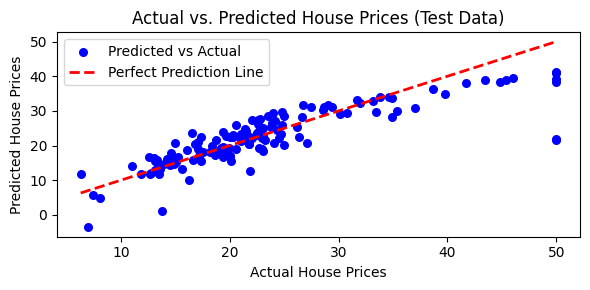

In [103]:
plt.figure(figsize=(6, 3))

# Scatter plot of actual vs predicted prices for test data
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted vs Actual', s=30)  # s=30 reduces point size
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices (Test Data)')
plt.legend()
plt.tight_layout()
plt.show()

### Comparing MSE and R² Values for Model Evaluation
- A lower MSE indicates better model performance
- Higher R² indicates better explanation of variance in the target variable

In [105]:
# Print comparison of MSE and R²
print("Training MSE: ", mse_train)
print("Test MSE: ", mse_test)
print("Training R²: ", r2_train)
print("Test R²: ", r2_test)

# Calculate and print metrics using scikit-learn
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Example output:
print("Model Performance:")
print(f"Training MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Training R²: {r2_train:.2f}, Test R²: {r2_test:.2f}")

Training MSE:  17.422175382176093
Test MSE:  26.179795086320848
Training R²:  0.7778016652996415
Test R²:  0.7135636037348243
Model Performance:
Training MSE: 17.42, Test MSE: 26.18
Training R²: 0.78, Test R²: 0.71


- The model demonstrates strong and balanced performance on both training and test datasets.

#### Implementing Decision Trees and Random Forest Regression Models

In [118]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}, R²: {r2_dt}")

Decision Tree MSE: 22.1113768115942, R²: 0.7580766744166106


In [119]:
# Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R²: {r2_rf}")

Random Forest MSE: 17.914089115942037, R²: 0.8039997214712822
